In [1]:
using Plots
using OffsetArrays

Logistic Map

$$
x_{n+1} = \lambda x_n (1 - x_n)
$$

In [2]:
function f(x0::Float64, λ::Float64, digits::Int, n::Int, d::Int)
    x = zeros(n+1)
    x = OffsetVector(x, 0:n)
    x[0] = x0
    for i = 1:n
        x[i] = λ * x[i-1] * (1 - x[i-1])
    end
    x = round.(x; digits=digits)
    unique!(x[end-d:end])
end

f (generic function with 1 method)

In [3]:
function logistic_map(x0::Float64, λ0::Float64, λ1::Float64; digits::Int=3, n::Int=20000, check_last::Int=2048, resolution::Float64=0.1)
    λs = λ0:resolution:λ1
    xs = Vector{Float64}()
    ys = similar(xs)
    
    for l ∈ λs
        y = f(x0, l, digits, n, check_last)
        x = fill(l, length(y))
        append!(xs, x)
        append!(ys, y)
    end
    return xs, ys
end

logistic_map (generic function with 1 method)

In [54]:
r = range(3.5, 3.99; length=3840)
x, y = logistic_map(0.5, r[1], r[end]; resolution=step(r), check_last=2160)

([3.5, 3.5, 3.5, 3.5, 3.5001276374055745, 3.5001276374055745, 3.5001276374055745, 3.5001276374055745, 3.5002552748111486, 3.5002552748111486  …  3.99, 3.99, 3.99, 3.99, 3.99, 3.99, 3.99, 3.99, 3.99, 3.99], [0.501, 0.875, 0.383, 0.827, 0.501, 0.875, 0.383, 0.827, 0.501, 0.875  …  0.237, 0.721, 0.116, 0.408, 0.925, 0.802, 0.634, 0.276, 0.457, 0.15])

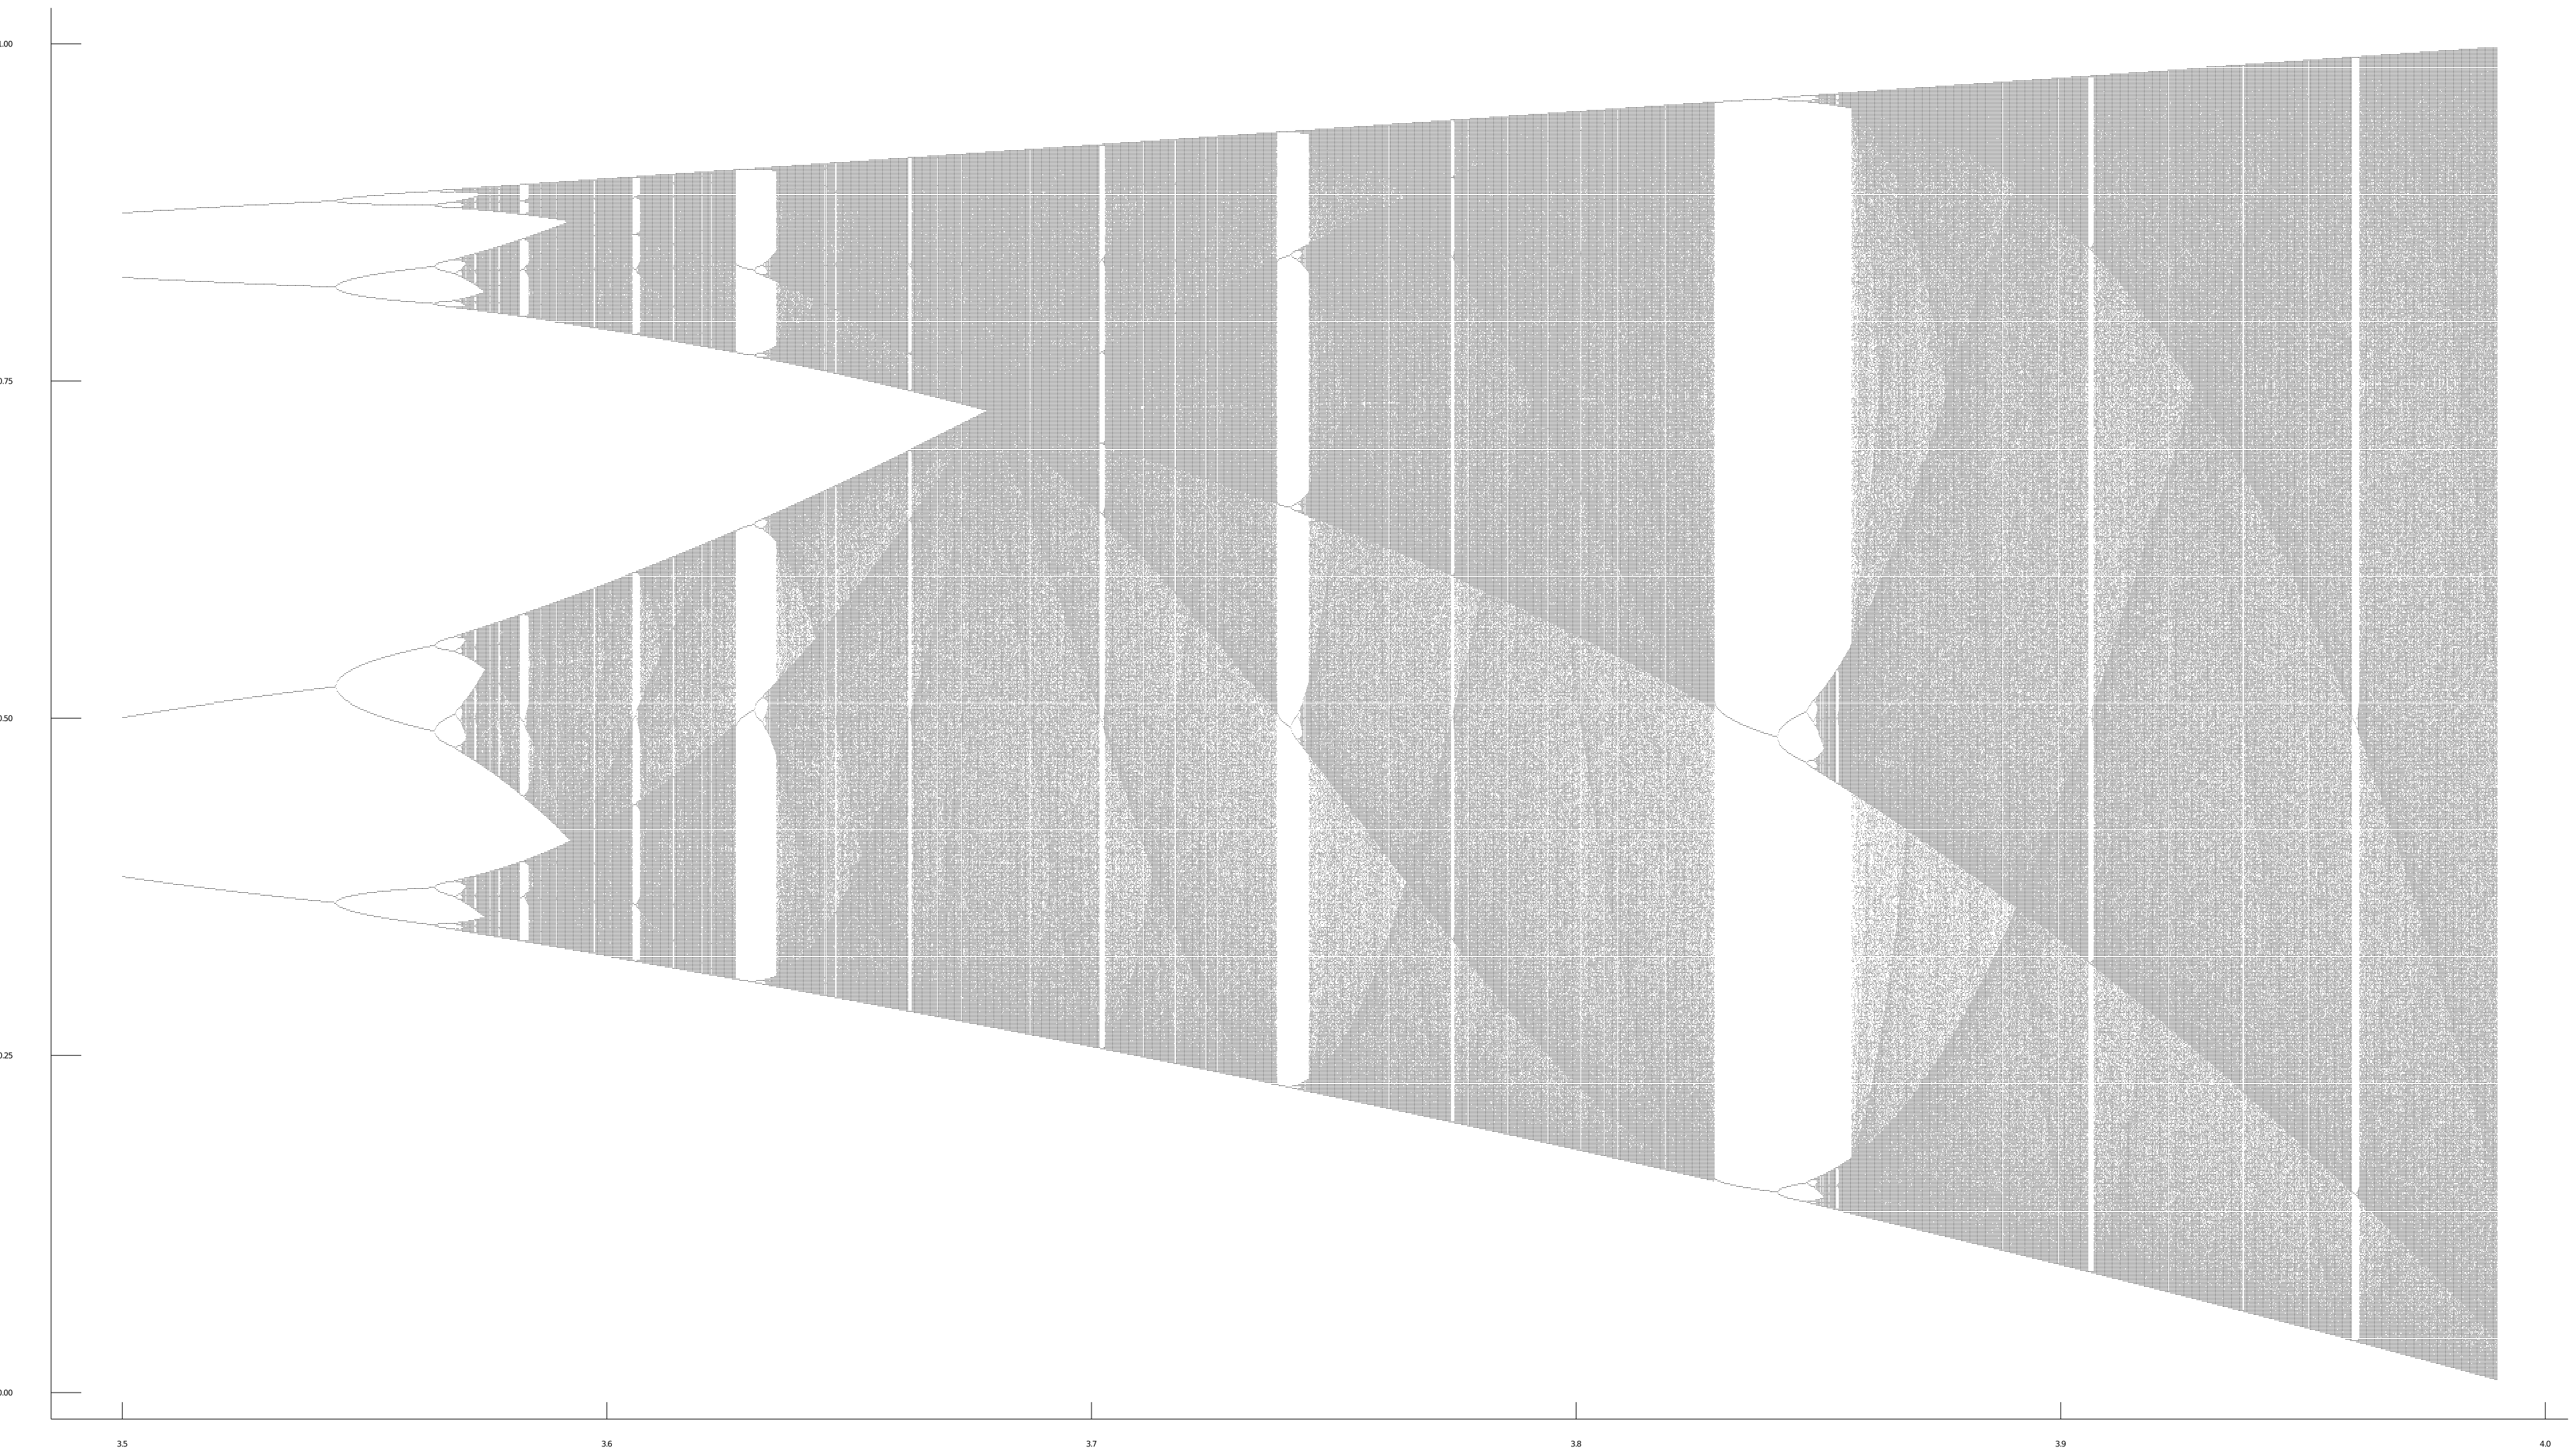

In [55]:
plot(x, y, seriestype=:scatter, legend=false,
    markershape=:circle, markersize=1, msw=0, mα=0.5, mc=:black,
    grid=false, size=(3840, 2160), fmt=:png)

In [56]:
png("logistic_map")